In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
original_data = pd.read_csv('data/GCB2022v27_MtCO2_flat.csv')

In [3]:
original_data.head()


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = original_data.copy()


In [5]:
data.dtypes.value_counts()


float64    8
object     2
int64      1
dtype: int64

In [6]:
data.isnull().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

In [7]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

Country               0.000000
Year                  0.000000
Total                 0.003169
ISO 3166-1 alpha-3    0.025862
Coal                  0.655426
Oil                   0.655854
Gas                   0.657423
Flaring               0.658500
Cement                0.670164
Per Capita            0.699322
Other                 0.974328
dtype: float64

In [8]:
data = data[data.columns[data.isna().sum()/data.shape[0] <0.9]]
data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

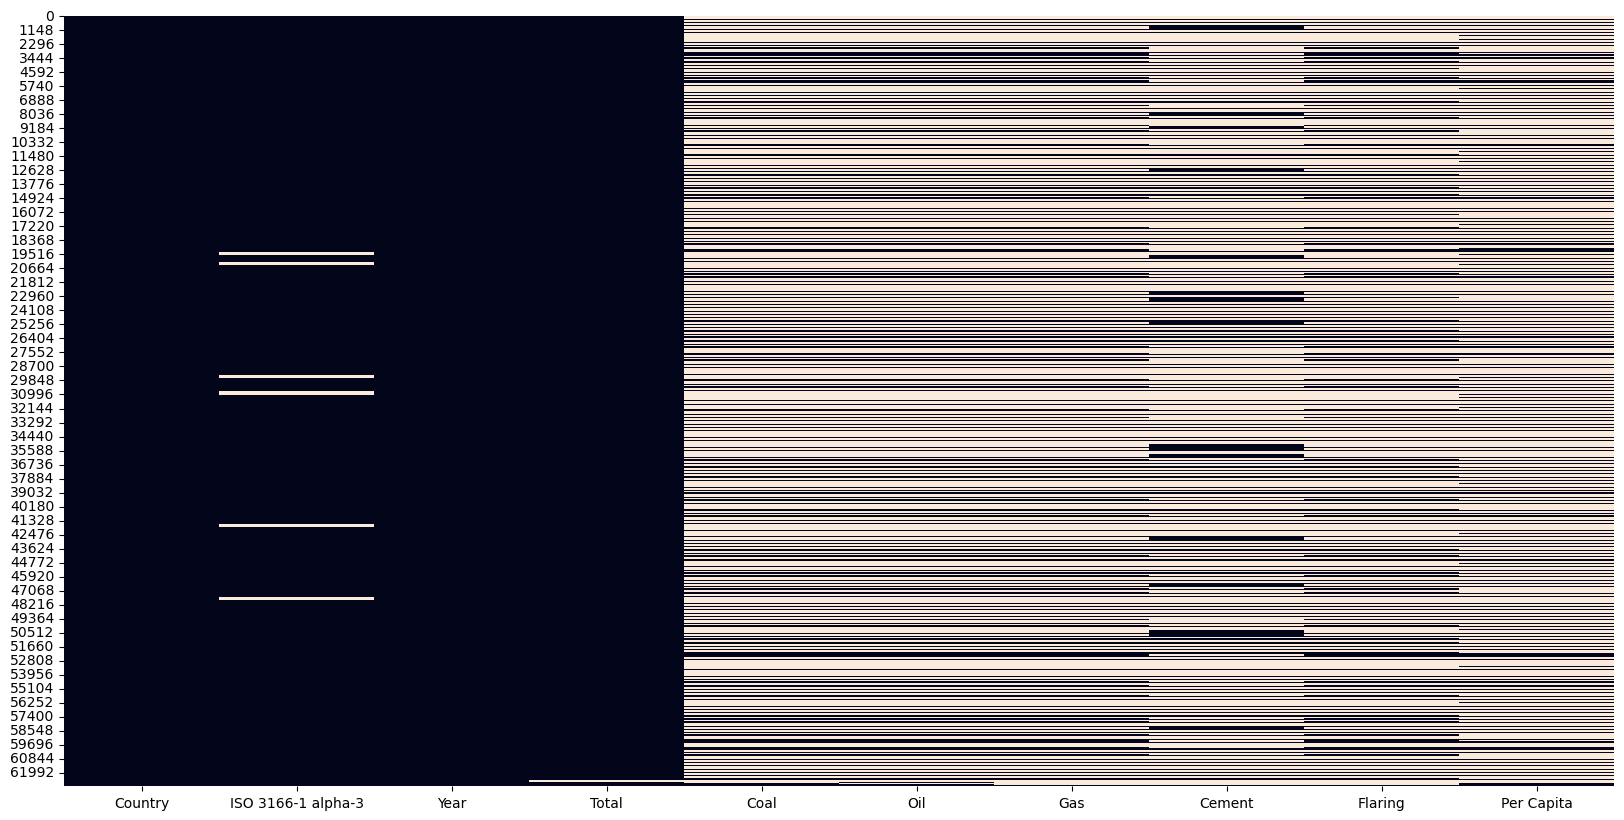

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

In [10]:
data['Country'].value_counts(normalize=True)


Afghanistan    0.00431
Peru           0.00431
Niger          0.00431
Nigeria        0.00431
Niue           0.00431
                ...   
Greenland      0.00431
Grenada        0.00431
Guadeloupe     0.00431
Guatemala      0.00431
Global         0.00431
Name: Country, Length: 232, dtype: float64

In [11]:
data_valuecounts = data['Total'].value_counts(normalize=True)
data_valuecounts

0.000000        0.655078
0.003664        0.003100
0.010992        0.002528
0.047632        0.001844
0.007328        0.001812
                  ...   
27.749511       0.000016
31.477311       0.000016
37.131214       0.000016
36.061767       0.000016
37123.850352    0.000016
Name: Total, Length: 16193, dtype: float64

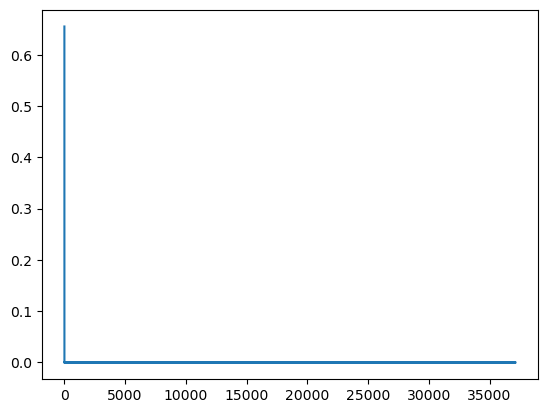

In [12]:
plt.figure()
plt.plot(data_valuecounts)

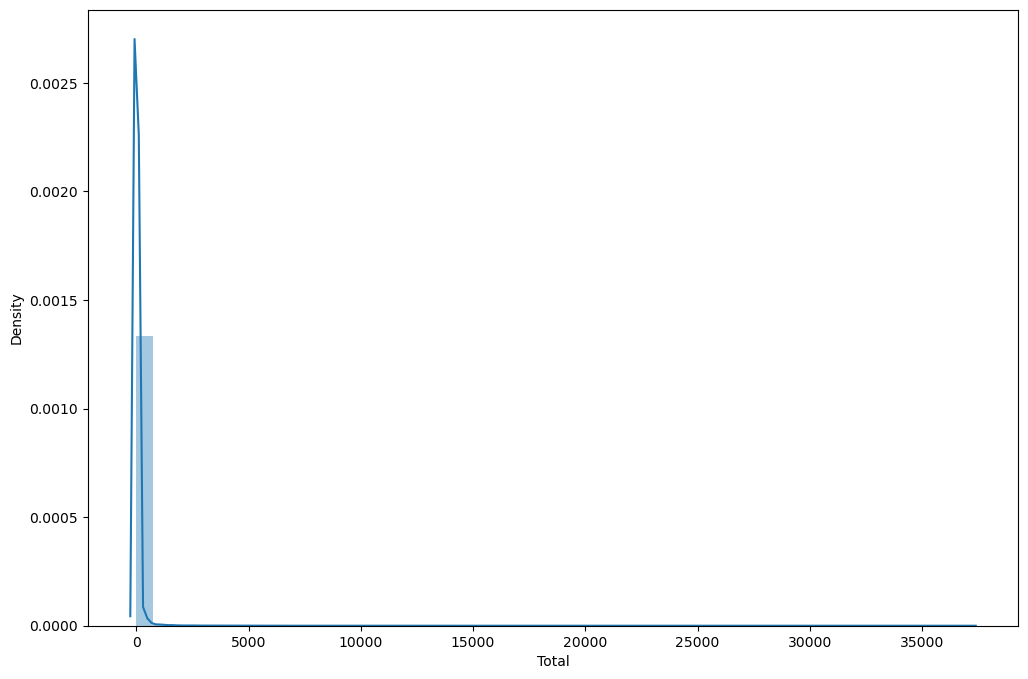

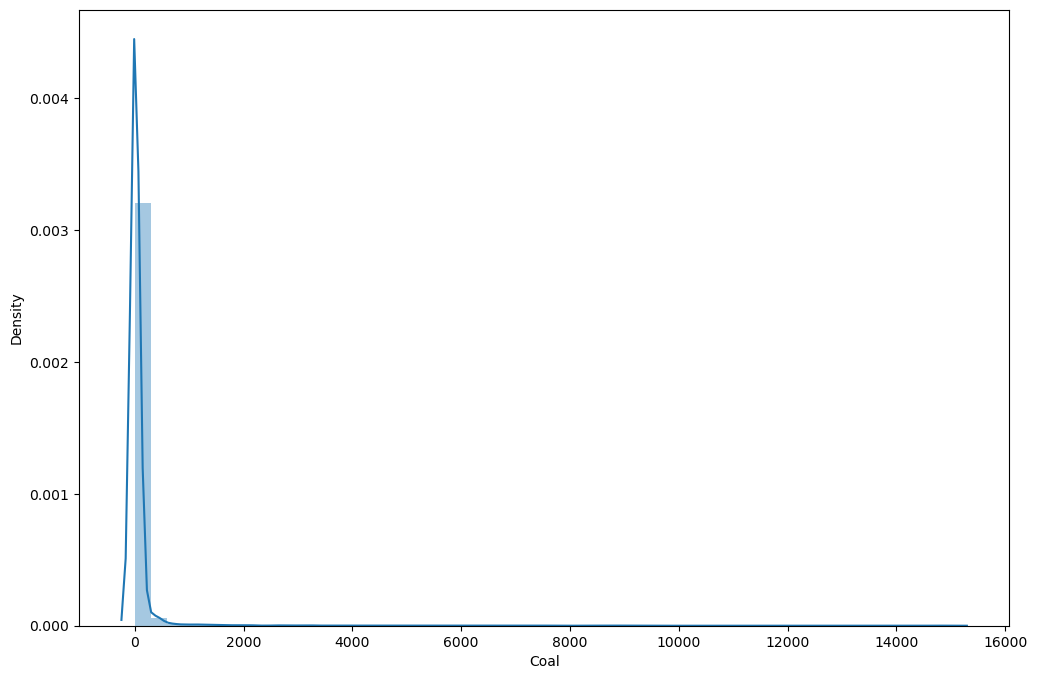

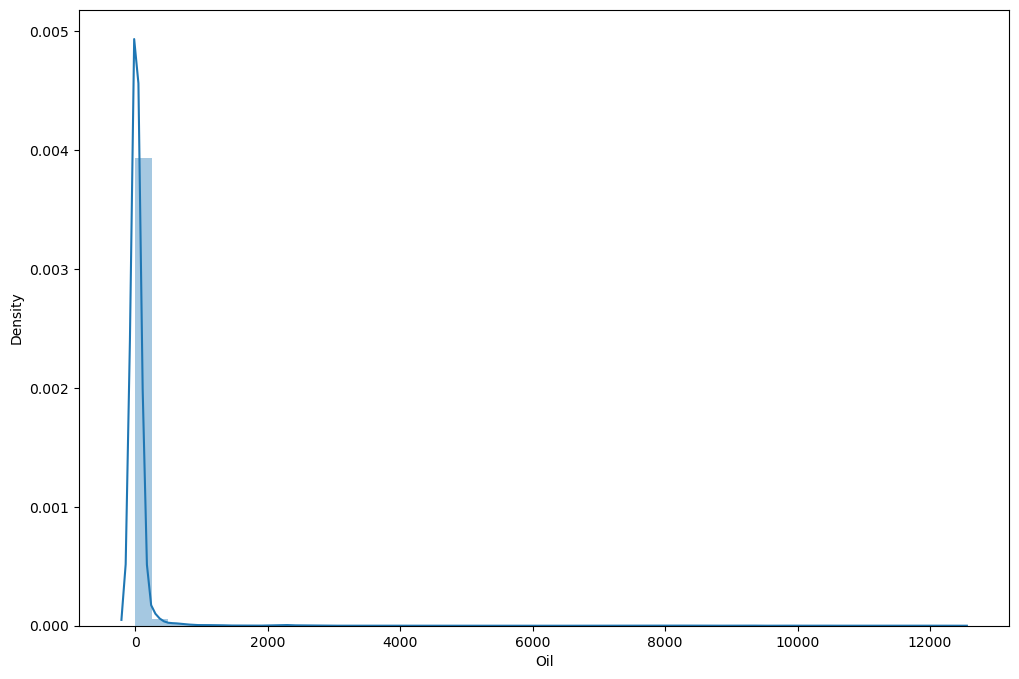

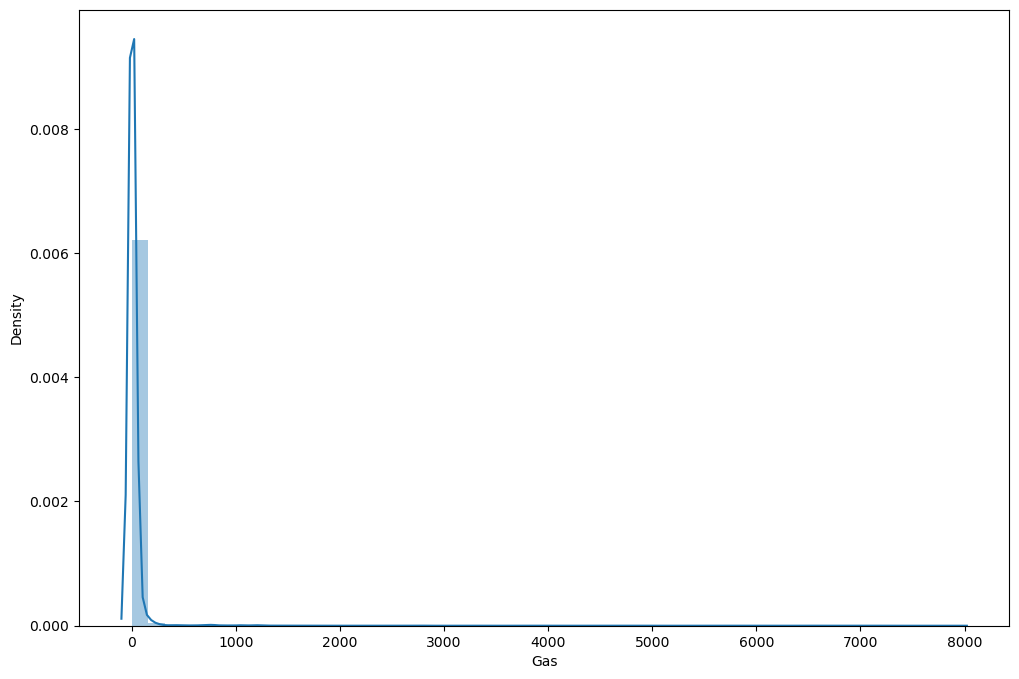

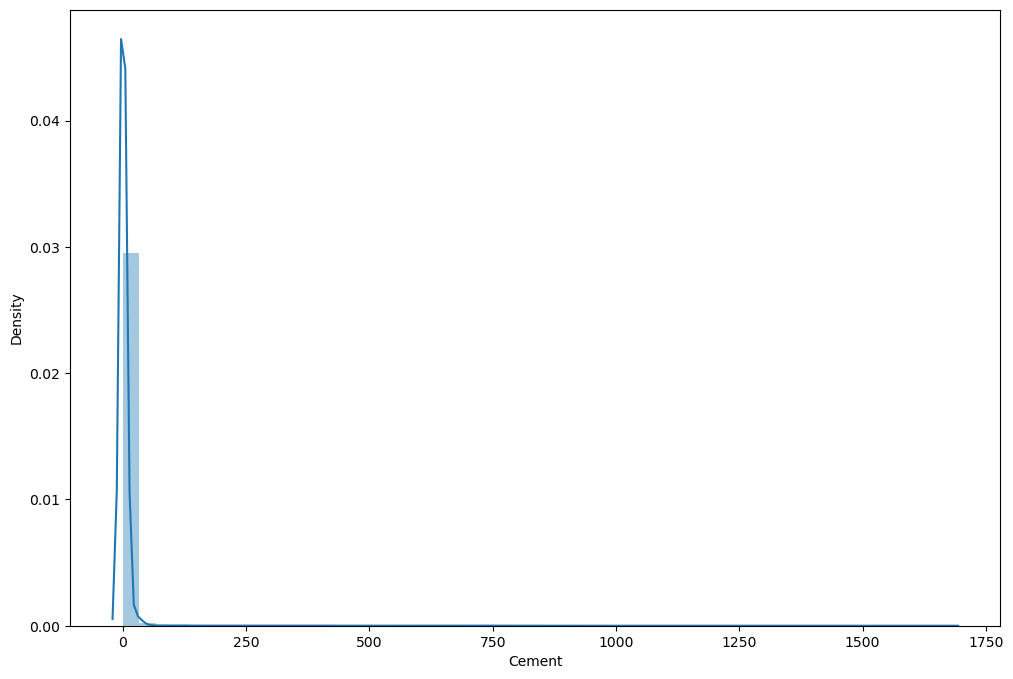

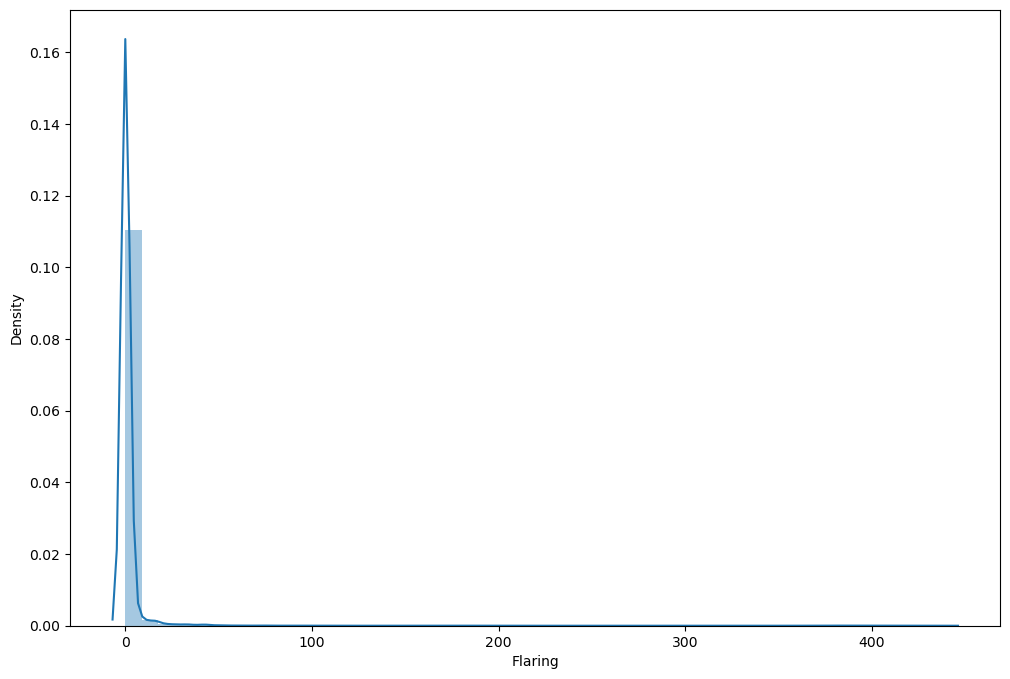

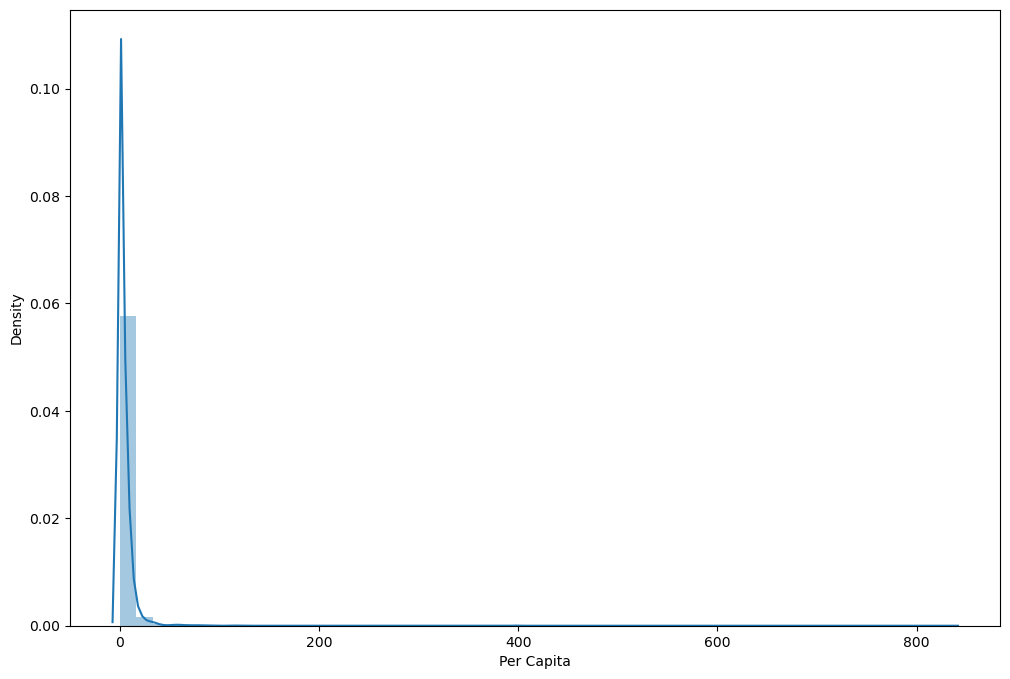

In [13]:
for col in data.select_dtypes('float'):
    plt.figure(figsize=(12,8))
    sns.distplot(data[col])

In [14]:
for col in data.select_dtypes('object'):
    print(f'{col :-<50} {data[col].unique()}')

Country------------------------------------------- ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bonaire, Saint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Côte d'Ivoire"
 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'North Korea'
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Faeroe Islands'
 'Micronesia (Federated States of)' 'Fiji' 'Finland' 'Panama Canal Zone'
 'Franc